In [ ]:
import nltk
import pandas as pd
import string
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.corpus import wordnet, stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tag import pos_tag
from nltk.probability import FreqDist

nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('wordnet')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
stop_words = stopwords.words('english')

Dataset diambil dari
https://www.kaggle.com/datasets/yasserh/twitter-tweets-sentiment-dataset

In [ ]:
df = pd.read_csv('/content/Tweets.csv')
df.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [ ]:
df.drop(['selected_text', 'textID'], axis=1, inplace=True)
df.head()

,text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...",negative


In [ ]:
display(df.isnull().sum())

,0
text,1
sentiment,0


Menghapus nilai null dan check value duplikat

In [ ]:
df.dropna(inplace=True)
df.duplicated().sum()

np.int64(0)

In [ ]:
display(df.isnull().sum())

,0
text,0
sentiment,0


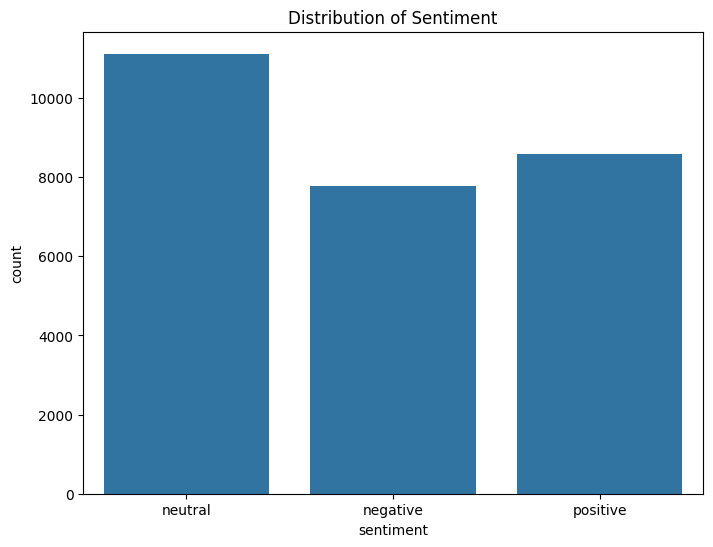

In [ ]:
plt.figure(figsize=(8, 6))
plt.title('Distribution of Sentiment')
sns.countplot(x='sentiment', data=df)
plt.show()

In [ ]:
import re

def normalize_text(text):
  text = text.lower()
  text = re.sub(r'[^\w\s]', '', text)  # Hapus karakter khusus
  return text

df['processed_text'] = df['text'].apply(normalize_text)
df['processed_text'] = df['processed_text'].apply(word_tokenize) #Tokenisasi
df['processed_text'] = df['processed_text'].apply(lambda x: ' '.join(x)) #Menggabungkan kembali setiap token menjadi sebuah string

In [ ]:
df.head(10)

,text,sentiment,processed_text
0,"I`d have responded, if I were going",neutral,id have responded if i were going
1,Sooo SAD I will miss you here in San Diego!!!,negative,sooo sad i will miss you here in san diego
2,my boss is bullying me...,negative,my boss is bullying me
3,what interview! leave me alone,negative,what interview leave me alone
4,"Sons of ****, why couldn`t they put them on t...",negative,sons of why couldnt they put them on the relea...
5,http://www.dothebouncy.com/smf - some shameles...,neutral,httpwwwdothebouncycomsmf some shameless pluggi...
6,2am feedings for the baby are fun when he is a...,positive,2am feedings for the baby are fun when he is a...
7,Soooo high,neutral,soooo high
8,Both of you,neutral,both of you
9,Journey!? Wow... u just became cooler. hehe....,positive,journey wow u just became cooler hehe is that ...


Ada kolom dengan isi blank pada bagian processed_text index ke 8 sehingga harus di remove untuk menghindari skewed result

In [ ]:
df = df[df['processed_text'] != '']

In [ ]:
df.head(10)

,text,sentiment,processed_text
0,"I`d have responded, if I were going",neutral,id have responded if i were going
1,Sooo SAD I will miss you here in San Diego!!!,negative,sooo sad i will miss you here in san diego
2,my boss is bullying me...,negative,my boss is bullying me
3,what interview! leave me alone,negative,what interview leave me alone
4,"Sons of ****, why couldn`t they put them on t...",negative,sons of why couldnt they put them on the relea...
5,http://www.dothebouncy.com/smf - some shameles...,neutral,httpwwwdothebouncycomsmf some shameless pluggi...
6,2am feedings for the baby are fun when he is a...,positive,2am feedings for the baby are fun when he is a...
7,Soooo high,neutral,soooo high
8,Both of you,neutral,both of you
9,Journey!? Wow... u just became cooler. hehe....,positive,journey wow u just became cooler hehe is that ...


Pembagian data 80% untuk training dan 20% untuk testing

In [ ]:
from sklearn.model_selection import train_test_split

X = df['processed_text']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1,3))
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

**Membuat Model**

MODEL 1 (Suport Vector Classifier Model)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

In [ ]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_vec, y_train)

SVC(kernel='linear')

In [ ]:
y_pred_svm = svm_model.predict(X_test_vec)

In [ ]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')
print("Accuracy:", accuracy_svm)
print("F1 Score:", f1_svm)
print(classification_report(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))

Accuracy: 0.6895924308588064
F1 Score: 0.6903604824316748
              precision    recall  f1-score   support

    negative       0.66      0.67      0.67      1544
     neutral       0.65      0.67      0.66      2215
    positive       0.77      0.73      0.75      1737

    accuracy                           0.69      5496
   macro avg       0.69      0.69      0.69      5496
weighted avg       0.69      0.69      0.69      5496

[[1031  439   74]
 [ 432 1484  299]
 [  88  374 1275]]


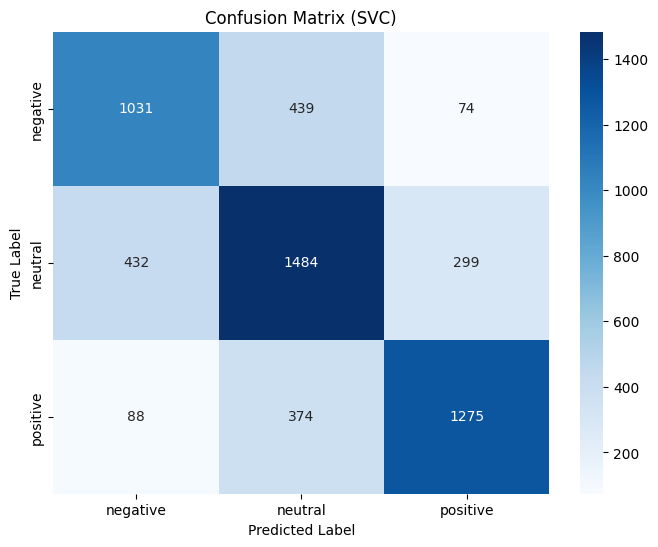

In [ ]:
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['negative', 'neutral', 'positive'],
            yticklabels=['negative', 'neutral', 'positive'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (SVC)")
plt.show()

MODEL 2 (Multinomial Naive Bayes Model)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()

In [ ]:
nb_model.fit(X_train_vec, y_train)
y_pred_nb = nb_model.predict(X_test_vec)

In [ ]:
accuracy_nb = accuracy_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb, average='weighted')
print("Accuracy (MultinomialNB):", accuracy_nb)
print("F1 Score (MultinomialNB):", f1_nb)
print(classification_report(y_test, y_pred_nb))
print(confusion_matrix(y_test, y_pred_nb))

Accuracy (MultinomialNB): 0.5918850072780204
F1 Score (MultinomialNB): 0.5636646135191986
              precision    recall  f1-score   support

    negative       0.84      0.26      0.39      1544
     neutral       0.50      0.92      0.65      2215
    positive       0.85      0.47      0.61      1737

    accuracy                           0.59      5496
   macro avg       0.73      0.55      0.55      5496
weighted avg       0.71      0.59      0.56      5496

[[ 394 1119   31]
 [  64 2039  112]
 [  13  904  820]]


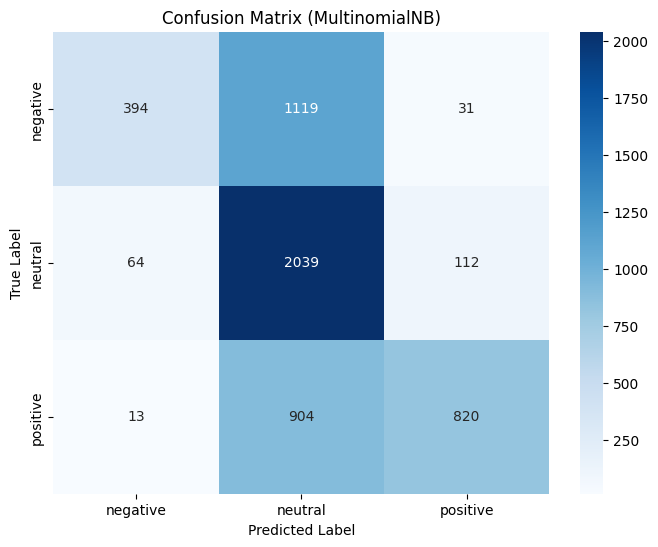

In [ ]:
cm_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Blues",
            xticklabels=['negative', 'neutral', 'positive'],
            yticklabels=['negative', 'neutral', 'positive'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (MultinomialNB)")
plt.show()

MODEL 3 (Logistic Regression Model)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(max_iter=1000) #menentukan jumlah iterasi

In [ ]:
lr_model.fit(X_train_vec, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred_lr = lr_model.predict(X_test_vec)

In [ ]:
accuracy_lr = accuracy_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')
print("Accuracy (Logistic Regression):", accuracy_lr)
print("F1 Score (Logistic Regression):", f1_lr)
print(classification_report(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))

Accuracy (Logistic Regression): 0.6759461426491994
F1 Score (Logistic Regression): 0.6769541320372743
              precision    recall  f1-score   support

    negative       0.65      0.64      0.64      1544
     neutral       0.63      0.68      0.65      2215
    positive       0.77      0.71      0.74      1737

    accuracy                           0.68      5496
   macro avg       0.68      0.67      0.68      5496
weighted avg       0.68      0.68      0.68      5496

[[ 981  477   86]
 [ 427 1503  285]
 [  95  411 1231]]


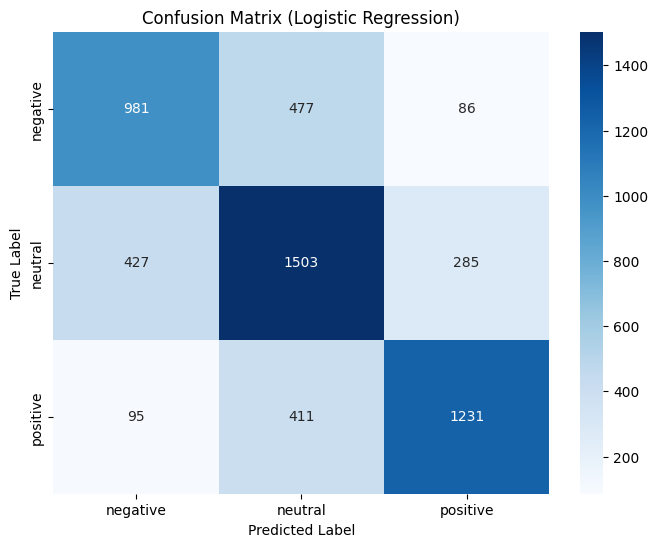

In [ ]:
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues",
            xticklabels=['negative', 'neutral', 'positive'],
            yticklabels=['negative', 'neutral', 'positive'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Logistic Regression)")
plt.show()

MODEL 4 (Random Forest Model)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100) #menentukan jumlah pohon

In [ ]:
rf_model.fit(X_train_vec, y_train)
y_pred_rf = rf_model.predict(X_test_vec)

In [ ]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
print("Accuracy (Random Forest):", accuracy_rf)
print("F1 Score (Random Forest):", f1_rf)
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

Accuracy (Random Forest): 0.6470160116448326
F1 Score (Random Forest): 0.6416702880875373
              precision    recall  f1-score   support

    negative       0.74      0.45      0.56      1544
     neutral       0.56      0.83      0.67      2215
    positive       0.81      0.59      0.68      1737

    accuracy                           0.65      5496
   macro avg       0.70      0.62      0.64      5496
weighted avg       0.69      0.65      0.64      5496

[[ 691  797   56]
 [ 197 1839  179]
 [  50  661 1026]]


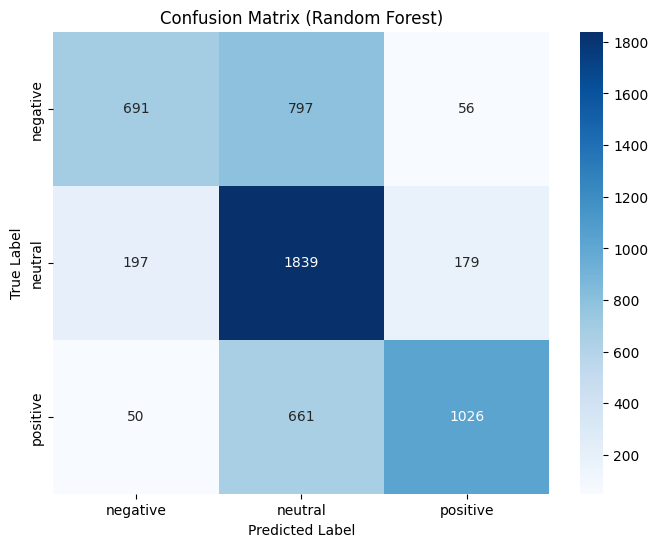

In [ ]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues",
            xticklabels=['negative', 'neutral', 'positive'],
            yticklabels=['negative', 'neutral', 'positive'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Random Forest)")
plt.show()

MODEL 5 (Long Short-Term Memory Model (deep learning model))

Pada model LSTM ini, saya menggunakan data preprocessing yang berbeda karena preprocessing seperti stemming/lemmatization seperti pada model tradisional bisa merusak urutan kata. ini penting untuk LSTM yang belajar dari sequence. Stopword removal yang dilakukan pada model tradisional juga bisa membuang kata-kata penting bagi konteks (misalnya: “not” dalam “not good”).

In [ ]:
!pip install tensorflow

In [ ]:
import numpy as np
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

# Membersihkan data
def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-zA-Z\s]", '', text)
    text = re.sub(r"\s+", ' ', text).strip()
    return text

df['text'] = df['text'].astype(str).apply(clean_text)

# Mempersiapkan data texts dan labels
texts = df['text'].values
labels = df['sentiment'].values

# Mengencode labels
le = LabelEncoder()
labels = le.fit_transform(labels)

# Tokenize dan pad sequences (padding digunakan untuk menyamakan semua input dengan panjang tertentu)
tokenizer = Tokenizer(num_words=20000, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
padded = pad_sequences(sequences, maxlen=100, padding='post')

# Splitting data untuk training dan testing
X_train, X_test, y_train, y_test = train_test_split(padded, labels, test_size=0.2, random_state=42)

# Menghitung class weights (Untuk menyeimbangkan bobot setiap kelas)
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(class_weights))

# Building LSTM model
model = Sequential([
    Embedding(input_dim=20000, output_dim=128, input_length=100),
    Bidirectional(LSTM(128, return_sequences=True)),
    Dropout(0.5),
    Bidirectional(LSTM(64)),
    Dropout(0.5),
    Dense(3, activation='softmax')
])
# Bidirectional LSTM adalah LSTM dua arah untuk menangkap konteks dari depan dan belakang
# Activation function yang digunakan adalah softmax karena label memiliki 3 output yang berarti multi class bukan binary

model.build(input_shape=(None, 100))
model.summary()

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# Training menggunakan early stopping
early_stop = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=32,
    class_weight=class_weights,
    callbacks=[early_stop]
)

# Evaluate model
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_labels, target_names=le.classes_))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 100, 128)       │     2,560,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 100, 256)       │       263,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ (None, 128)            │       164,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,987,907 (11.40 MB)

 Trainable params: 2,987,907 (11.40 MB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 100, 128)       │     2,560,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 100, 256)       │       263,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ (None, 128)            │       164,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,987,907 (11.40 MB)

 Trainable params: 2,987,907 (11.40 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 379s 542ms/step - accuracy: 0.5173 - loss: 0.9263 - val_accuracy: 0.7076 - val_loss: 0.6950
Epoch 2/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 366s 532ms/step - accuracy: 0.7704 - loss: 0.5644 - val_accuracy: 0.7054 - val_loss: 0.6874
Epoch 3/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 361s 525ms/step - accuracy: 0.8503 - loss: 0.4030 - val_accuracy: 0.7036 - val_loss: 0.7486
Epoch 4/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 398s 549ms/step - accuracy: 0.8903 - loss: 0.3002 - val_accuracy: 0.6983 - val_loss: 0.8557
172/172 ━━━━━━━━━━━━━━━━━━━━ 21s 120ms/step
              precision    recall  f1-score   support

    negative       0.67      0.69      0.68      1544
     neutral       0.68      0.68      0.68      2215
    positive       0.78      0.76      0.77      1737

    accuracy                           0.71      5496
   macro avg       0.71      0.71      0.71      5496
weighted avg       0.71      0.71      0.71      5496



In [ ]:
accuracy_lstm = accuracy_score(y_test, y_pred_labels)
f1_lstm = f1_score(y_test, y_pred_labels, average='weighted')
print("Accuracy (LSTM):", accuracy_lstm)
print("F1 Score (LSTM):", f1_lstm)
print(confusion_matrix(y_test, y_pred_labels))

Accuracy (LSTM): 0.7076055312954876
F1 Score (LSTM): 0.7080555264288982
[[1071  402   71]
 [ 416 1504  295]
 [ 102  321 1314]]


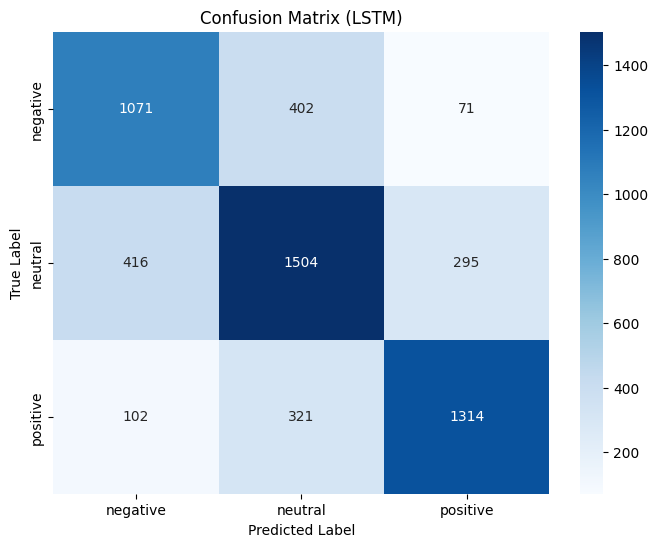

In [ ]:
cm_lstm = confusion_matrix(y_test, y_pred_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lstm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['negative', 'neutral', 'positive'],
            yticklabels=['negative', 'neutral', 'positive'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (LSTM)")
plt.show()

MODEL 6 (Gated Recurrent Unit Model (deep learning model))

Pada model GRU ini, saya menggunakan preprocessing data yang sama dengan model LTSM dan arsitektur yang hampir sama

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout, Bidirectional

# Modeling GRU
gru_model = Sequential([
    Embedding(input_dim=20000, output_dim=128, input_length=100),
    Bidirectional(GRU(128, return_sequences=True)),
    Dropout(0.5),
    Bidirectional(GRU(64)),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

gru_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
gru_model.summary()

# Training GRU model
early_stop_gru = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

history_gru = gru_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=32,
    class_weight=class_weights,
    callbacks=[early_stop_gru]
)

# Evaluasi
y_pred_gru = gru_model.predict(X_test)
y_pred_labels_gru = np.argmax(y_pred_gru, axis=1)

print(classification_report(y_test, y_pred_labels_gru, target_names=le.classes_))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_4 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_5 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 288s 407ms/step - accuracy: 0.5269 - loss: 0.9282 - val_accuracy: 0.7005 - val_loss: 0.6931
Epoch 2/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 343s 438ms/step - accuracy: 0.7684 - loss: 0.5501 - val_accuracy: 0.7061 - val_loss: 0.7057
Epoch 3/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 316s 429ms/step - accuracy: 0.8524 - loss: 0.3848 - val_accuracy: 0.6850 - val_loss: 0.8020
Epoch 4/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 322s 429ms/step - accuracy: 0.9026 - loss: 0.2802 - val_accuracy: 0.6905 - val_loss: 0.8541
Epoch 5/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 324s 433ms/step - accuracy: 0.9258 - loss: 0.2137 - val_accuracy: 0.6860 - val_loss: 0.9842
172/172 ━━━━━━━━━━━━━━━━━━━━ 14s 78ms/step
              precision    recall  f1-score   support

    negative       0.73      0.63      0.67      1544
     neutral       0.65      0.73      0.69      2215
    positive       0.77      0.75      0.76      1737

    accuracy                           0.71      5496
   macro avg       0.72  

In [ ]:
accuracy_gru = accuracy_score(y_test, y_pred_labels_gru)
f1_gru = f1_score(y_test, y_pred_labels_gru, average='weighted')
print("Accuracy (GRU):", accuracy_gru)
print("F1 Score (GRU):", f1_gru)
print(confusion_matrix(y_test, y_pred_labels_gru))

Accuracy (GRU): 0.7061499272197962
F1 Score (GRU): 0.7061580006231128
[[ 970  498   76]
 [ 287 1610  318]
 [  77  359 1301]]


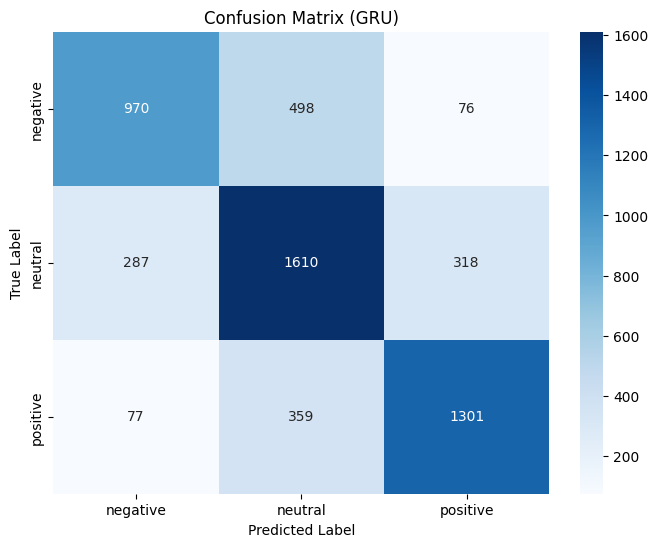

In [ ]:
cm_gru = confusion_matrix(y_test, y_pred_labels_gru)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gru, annot=True, fmt="d", cmap="Blues",
            xticklabels=['negative', 'neutral', 'positive'],
            yticklabels=['negative', 'neutral', 'positive'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (GRU)")
plt.show()

**EVALUASI dan Hasil Training Model**

In [ ]:
model_names = ['SVC', 'MultinomialNB', 'Logistic Regression', 'Random Forest', 'LSTM', 'GRU']

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, f1_score, roc_auc_score
f1_scores = [f1_svm, f1_nb, f1_lr, f1_rf, f1_lstm, f1_gru]
accuracy_scores = [accuracy_svm, accuracy_nb, accuracy_lr, accuracy_rf, accuracy_lstm, accuracy_gru]

Visualisasi dengan grafik

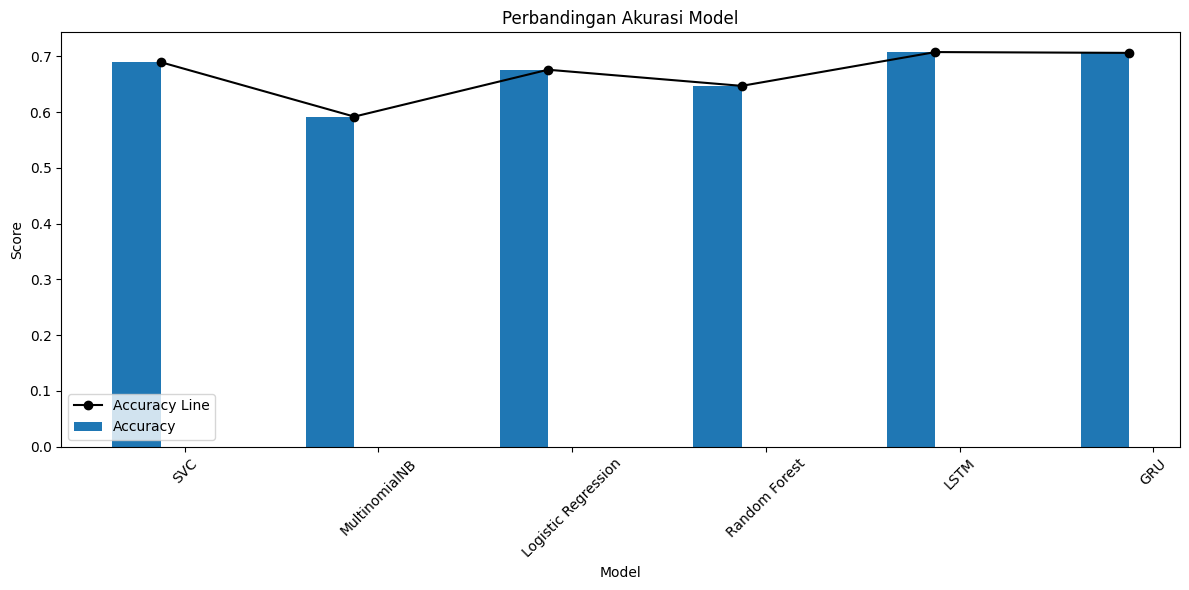

[0.6895924308588064, 0.5918850072780204, 0.6759461426491994, 0.6470160116448326, 0.7076055312954876, 0.7061499272197962]


In [ ]:
import numpy as np

bar_width = 0.25
index = np.arange(len(model_names))

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(index, accuracy_scores, bar_width, label='Accuracy')
ax.plot(index + bar_width/2, accuracy_scores, marker='o', linestyle='-', color='black', label='Accuracy Line')

ax.set_xlabel('Model')
ax.set_ylabel('Score')
ax.set_title('Perbandingan Akurasi Model')
ax.set_xticks(index + bar_width, model_names, rotation=45)
ax.legend()
plt.tight_layout()
plt.show()

print(accuracy_scores)

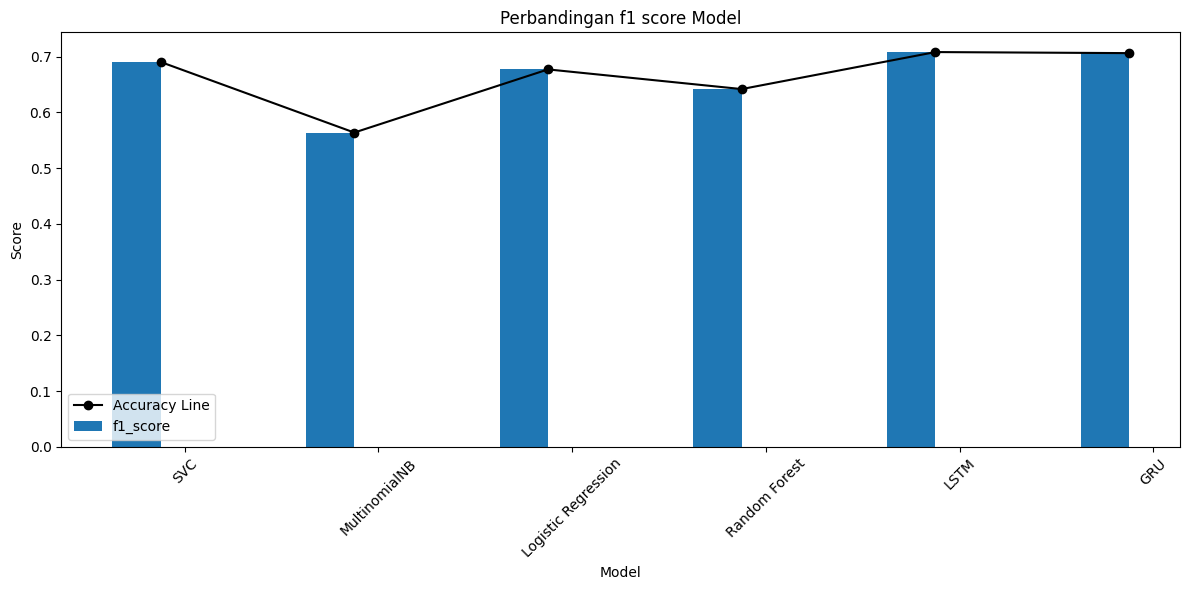

[0.6903604824316748, 0.5636646135191986, 0.6769541320372743, 0.6416702880875373, 0.7080555264288982, 0.7061580006231128]


In [ ]:
import numpy as np

bar_width = 0.25
index = np.arange(len(model_names))

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(index, f1_scores, bar_width, label='f1_score')
ax.plot(index + bar_width/2, f1_scores, marker='o', linestyle='-', color='black', label='Accuracy Line')

ax.set_xlabel('Model')
ax.set_ylabel('Score')
ax.set_title('Perbandingan f1 score Model')
ax.set_xticks(index + bar_width, model_names, rotation=45)
ax.legend()
plt.tight_layout()
plt.show()

print(f1_scores)

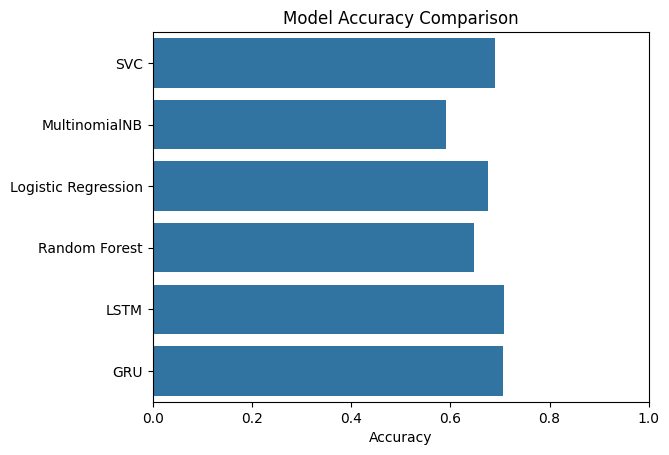

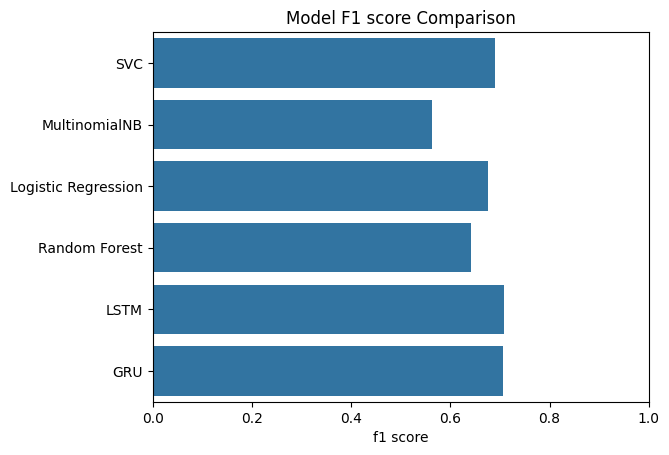

In [ ]:
sns.barplot(x=accuracy_scores, y=model_names)
plt.title("Model Accuracy Comparison")
plt.xlabel("Accuracy")
plt.xlim(0, 1)
plt.show()

sns.barplot(x=f1_scores, y=model_names)
plt.title("Model F1 score Comparison")
plt.xlabel("f1 score")
plt.xlim(0, 1)
plt.show()

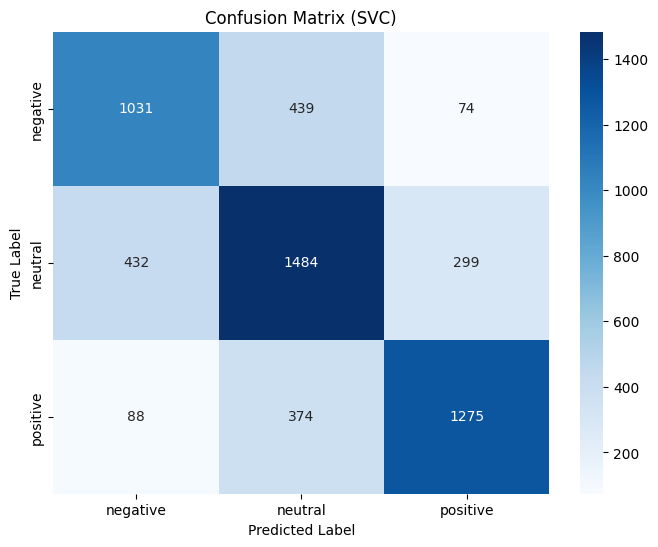

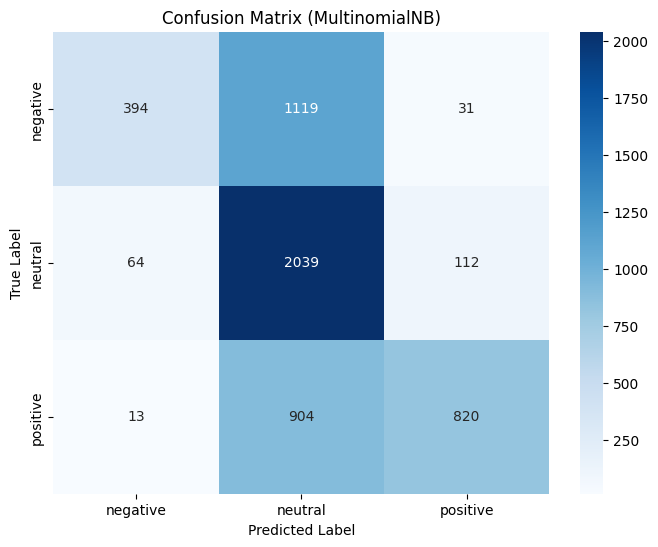

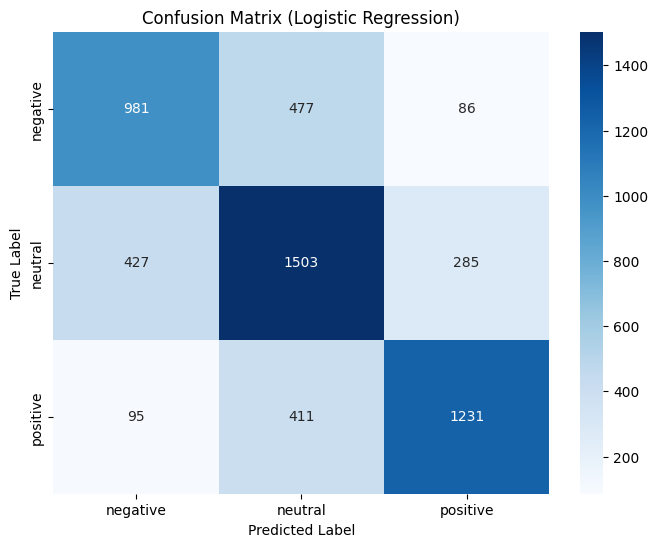

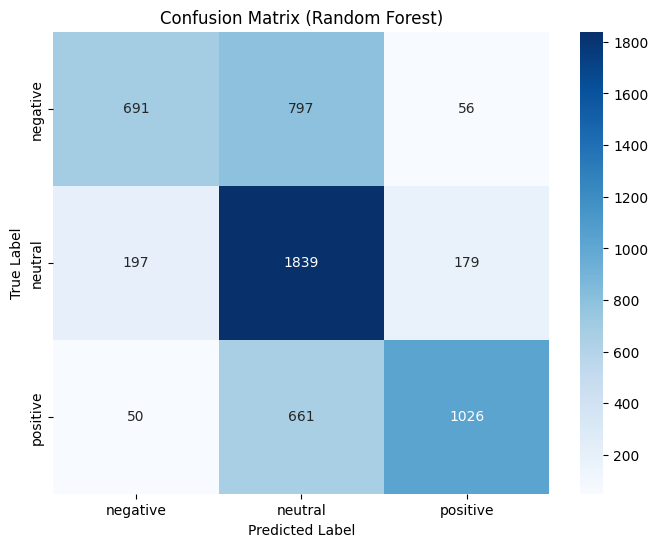

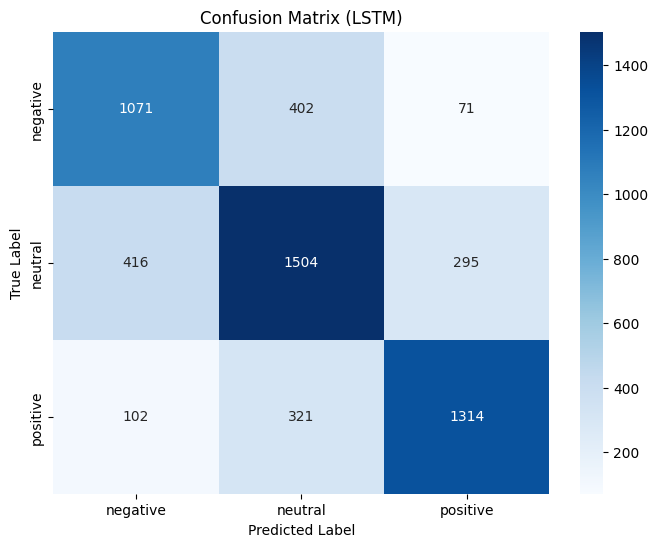

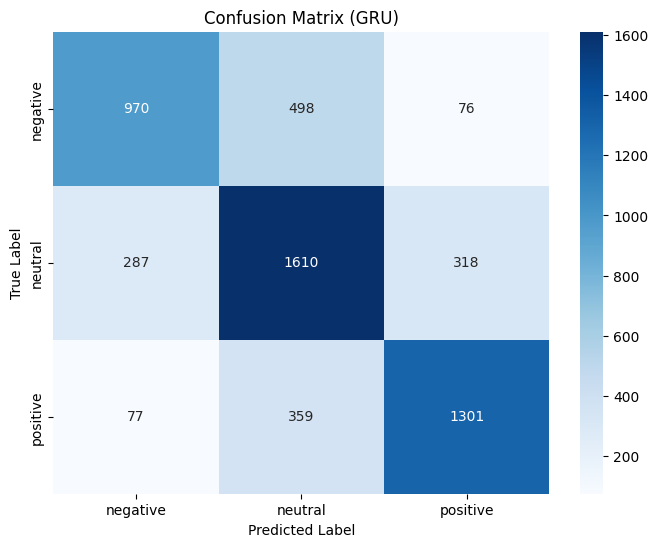

In [ ]:
def plot_confusion_matrix(cm, title):
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
              xticklabels=['negative', 'neutral', 'positive'],
              yticklabels=['negative', 'neutral', 'positive'])
  plt.xlabel("Predicted Label")
  plt.ylabel("True Label")
  plt.title(f"Confusion Matrix ({title})")
  plt.show()

plot_confusion_matrix(cm_svm, "SVC")
plot_confusion_matrix(cm_nb, "MultinomialNB")
plot_confusion_matrix(cm_lr, "Logistic Regression")
plot_confusion_matrix(cm_rf, "Random Forest")
plot_confusion_matrix(cm_lstm, "LSTM")
plot_confusion_matrix(cm_gru, "GRU")
